<a href="https://colab.research.google.com/github/luiz-star/Regressao_sckit-learn/blob/main/Regressao_scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear no Scikit-Learn

In [19]:
#Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
# Dados

x = [-1., -0.77777778, -0.55555556, -0.33333333, -0.11111111,
     0.11111111, 0.33333333, 0.55555556, 0.77777778, 1. ]

y = [-1.13956201, -0.57177999, -0.21697033, 0.5425699, 0.49406657,
     1.14972239, 1.64228553, 2.1749824, 2.64773614, 2.95684202]

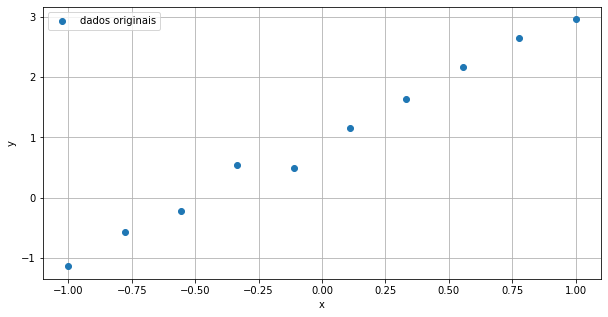

In [21]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados originais')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [22]:
# transformando em numpy array
x, y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)

In [23]:
# modelo
from sklearn.linear_model import LinearRegression

In [24]:
# treinando o modelo: y = a*x +b, valores reais (a, b) = (2, 1)
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# coeficientes a, b estimados:
# valores estimados usando numpy diretamente
# a estimado no numpy :  2.05414951
# b estimado no numpy : 0.96798926
print('a estimado:', reg.coef_.ravel()[0])
print('b estimado', reg.intercept_[0])

a estimado: 2.0541495120384856
b estimado 0.967989262


In [26]:
# predição do modelo
y_pred = reg.predict(x)

In [27]:
# score do modelo ( quanto mais perto de 1 melhor)
score = reg.score(x, y)
print('score:', score)

score: 0.9911602676388084


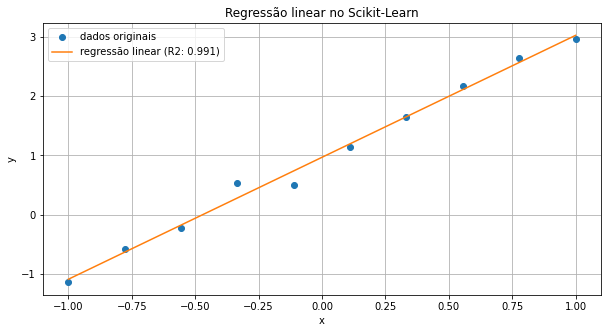

In [28]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados originais')
plt.plot(x, y_pred, label='regressão linear (R2: {:.3f})'.format(score))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão linear no Scikit-Learn')
plt.grid()
plt.show()

# Regressão linear no Scilit- learn- ll

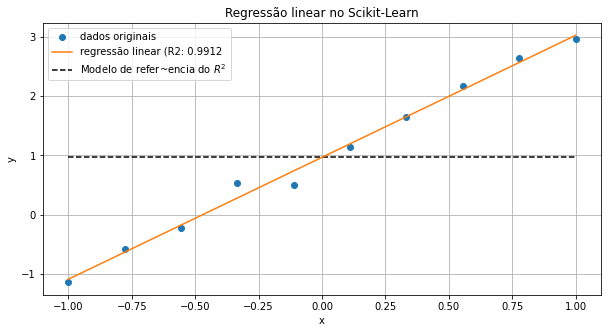

In [30]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados originais')
plt.plot(x, y_pred, label='regressão linear (R2: {:.4f}'.format(score))
plt.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), linestyle='dashed',# Baseline
           label='Modelo de refer~encia do $R^2$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão linear no Scikit-Learn')
plt.grid()
plt.show()

In [31]:
# função para calculo do MSE
def mse(y_true, y_pred, is_ref = False):

  # mse modelo
  if is_ref:
    mse = ((y_true - y_true.mean())**2).mean()
  else:
    mse = ((y_true - y_true - y_pred)**2).mean()  
  return mse  

In [32]:
# função para o calculo do coeficiente de determinação R2
def r2(mse_reg, mse_ref):
  return 1 - mse_reg/mse_ref

In [33]:
# visualizando y e y_pred
print('Y_true:', y.ravel())
print('y_pred:', y_pred.ravel())

Y_true: [-1.13956201 -0.57177999 -0.21697033  0.5425699   0.49406657  1.14972239
  1.64228553  2.1749824   2.64773614  2.95684202]
y_pred: [-1.08616025 -0.62968259 -0.17320492  0.28327276  0.73975043  1.19622809
  1.65270576  2.10918344  2.56566111  3.02213877]


In [35]:
# calculando o mse dos modelos
mse_reg = mse(y_true=y, y_pred=y_pred)
print('MSE do modelo de regressão:', mse_reg)
mse_ref = mse(y_true=y, y_pred=y_pred, is_ref=True)
print('Mse do modelo de referência:', mse_ref)

MSE do modelo de regressão: 2.656071082862579
Mse do modelo de referência: 1.734399498892871


In [36]:
# calculando o R2 score
r2_score = r2(mse_reg=mse_reg, mse_ref=mse_ref)
print('Coeficiente R2 do modelo implementado (calculado):', r2_score)

Coeficiente R2 do modelo implementado (calculado): -0.5314067402337488
